# Load libraris 

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import platform #운영 체제 
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

    
from sklearn.model_selection import train_test_split

#Scaling
import scipy
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


#Feature Selection
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

#Multicolinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Regression statsmodel
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Decision Tree 
import matplotlib.pyplot as pl
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

#Winsorizer
import scipy.stats

#XGboost
from xgboost import XGBRegressor

#SVM
from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_validate

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import time

# FEATURE EXTRACTION

# Data Loading

In [0]:
df = pd.read_csv('onion_columns_all_merge_final.csv')

df=df.iloc[:,3:]
X = df.iloc[:,1:]
y = df.iloc[:,0]
print("X",X.shape)
print("y",y.shape)

X (144, 189)
y (144,)


In [0]:
X.head()

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,2.954839,5.782143,7.812903,11.500000,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,-0.677419,6.114286,7.200000,13.076667,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,2.832258,2.762069,8.274194,13.986667,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,2.538710,4.700000,10.203226,12.573333,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,4.958065,5.835714,9.822581,14.600000,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


In [0]:
y.head()

0    7163
1    7393
2    6303
3    8265
4    7271
Name: 10a당 생산량 (kg), dtype: int64

# Winsorizing for outlier control

In [0]:
winsor = scipy.stats.mstats.winsorize

df_ws = pd.DataFrame()

for i in range(len(df.columns)):
    a = pd.DataFrame(winsor(df.iloc[:, i], limits = [0.01, 0.01]))
    df_ws = pd.concat([df_ws, a], axis = 1)
df_ws.columns=df.columns
print(df_ws.shape)
df_ws.head()

(144, 190)


,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,2.954839,5.782143,7.812903,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,7393,25.225806,27.877419,23.692222,18.245161,11.280000,5.177419,-0.677419,6.114286,7.200000,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,2.832258,2.762069,8.274194,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,2.538710,4.700000,10.203226,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,4.958065,5.835714,9.822581,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000


# Data Scaling

In [0]:
df_columns = df_ws.columns.tolist()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_ws)
df_scaled = pd.DataFrame(df_scaled, columns = df_columns)
df_scaled.head()

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.733774,0.493006,0.604198,0.874665,0.895347,0.709291,0.720025,0.721721,0.873414,0.646875,...,0.363636,0.556842,0.163447,0.374061,0.242348,0.211434,0.000000,0.222406,0.030460,0.539870
1,0.772750,0.684850,0.888266,1.000000,0.837010,0.729872,0.705103,0.462975,0.906795,0.569220,...,0.454545,0.556842,0.036845,0.171663,0.123007,0.113668,0.011007,0.349495,0.118132,0.341184
2,0.588036,0.670421,0.683421,0.948943,0.763117,1.000000,0.652648,0.712989,0.569887,0.705321,...,0.363636,0.013351,0.224817,0.214159,0.105914,0.214290,0.091563,0.167329,0.054592,0.035329
3,0.920522,0.715349,0.853231,0.807101,0.785745,0.616675,0.547514,0.692078,0.764655,0.949729,...,0.545455,0.037283,0.201149,0.094748,0.132333,0.210109,0.035562,0.127089,0.110623,0.023375
4,0.752076,0.771754,0.896473,0.998881,0.913379,0.693212,0.723190,0.864422,0.878798,0.901501,...,0.454545,0.126282,0.000000,0.123962,0.236502,0.210109,0.060964,0.222406,0.136138,0.021577


# IV(변수)와 DV(생산량)로 나누기  

In [0]:
X_scaled = df_scaled.iloc[:,1:]
y_scaled = df_scaled.iloc[:,0]
print("X_scaled:",X_scaled.shape)
print("y_scaled:",y_scaled.shape)

X_scaled: (144, 189)
y_scaled: (144,)


# 다중공선성 가능성 확인

## 1.Correlation 

In [0]:
corr = pd.DataFrame(X_scaled.corr())
corr[(corr > 0.9) & (corr <1)].stack().reset_index()

,level_0,level_1,0
0,평균기온 7월,최고기온 7월,0.936320
1,평균기온 7월,최저기온 7월,0.930472
2,평균기온 8월,최고기온 8월,0.957771
3,평균기온 8월,최저기온 8월,0.945817
4,평균기온 10월,최저기온 10월,0.938569
...,...,...,...
197,수소이온농도 pH,비소 As,0.946898
198,수소이온농도 pH,아연 Zn,0.961392
199,아연 Zn,구리 Cu,0.936755
200,아연 Zn,니켈 Ni,0.914572


## 2.VIF 

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif.sort_values('VIF Factor')

C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,inf,평균기온 7월
122,inf,9월 일산화탄소
123,inf,10월 일산화탄소
124,inf,11월 일산화탄소
125,inf,12월 일산화탄소
...,...,...
97,NaN,적설량 8월
98,NaN,적설량 9월
99,NaN,적설량 10월
106,NaN,적설량 5월


# 모든 값이 0인 컬럼: 
#### ['적설량 7월', '적설량 8월', '적설량 9월', '적설량 10월', '적설량 5월', '적설량 6월'] 제거 

In [0]:
zeros = []
for i in X_scaled.columns.tolist():
    if X_scaled[i].mean() == 0:
        zeros.append(i)
        
for i in zeros:
    X_scaled.drop(i,axis=1, inplace=True)
print("zeros\n",zeros)    
print(X_scaled.shape)
X_scaled.head()

zeros
 ['적설량 7월', '적설량 8월', '적설량 9월', '적설량 10월', '적설량 5월', '적설량 6월']
(144, 183)


C:\Users\sundooedu\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,0.493006,0.604198,0.874665,0.895347,0.709291,0.720025,0.721721,0.873414,0.646875,0.479121,...,0.363636,0.556842,0.163447,0.374061,0.242348,0.211434,0.000000,0.222406,0.030460,0.539870
1,0.684850,0.888266,1.000000,0.837010,0.729872,0.705103,0.462975,0.906795,0.569220,0.684434,...,0.454545,0.556842,0.036845,0.171663,0.123007,0.113668,0.011007,0.349495,0.118132,0.341184
2,0.670421,0.683421,0.948943,0.763117,1.000000,0.652648,0.712989,0.569887,0.705321,0.802934,...,0.363636,0.013351,0.224817,0.214159,0.105914,0.214290,0.091563,0.167329,0.054592,0.035329
3,0.715349,0.853231,0.807101,0.785745,0.616675,0.547514,0.692078,0.764655,0.949729,0.618890,...,0.545455,0.037283,0.201149,0.094748,0.132333,0.210109,0.035562,0.127089,0.110623,0.023375
4,0.771754,0.896473,0.998881,0.913379,0.693212,0.723190,0.864422,0.878798,0.901501,0.882802,...,0.454545,0.126282,0.000000,0.123962,0.236502,0.210109,0.060964,0.222406,0.136138,0.021577


# Modeling

# Train_test_split 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_scaled, 
                                                    test_size=0.3, 
                                                    random_state=0)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("\ny_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (100, 183)
X_test: (44, 183)

y_train: (100,)
y_test: (44,)


## 1. Linear Regression 

### 이상적인 FACTOR 개수 찾기1(eigen value) --> eigen value가 1이 넘는 지점 factor#<22

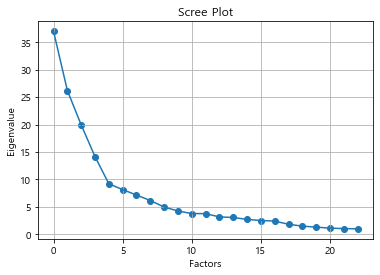

In [0]:
fa = FactorAnalyzer(n_factors=11,  rotation=None)
fa.fit(X_scaled)
ev, v =fa.get_eigenvalues()
ev = pd.DataFrame(ev)
ev1 = ev[ev[0] >= 1]

plt.scatter(range(0,len(ev1)),ev1)
plt.plot(range(0,len(ev1)),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### 1-1.이상적인 FACTOR 개수 찾기2(Cummulative Variance) --> 최소 60% 이상의 설명력 갖는 지점 factor# >6

In [0]:
for i in range(4,7):  
    fa = FactorAnalyzer(n_factors=i,  rotation=None)
    fa.fit(X_scaled)
    print(fa.get_factor_variance()[2])

[0.20012298 0.34148638 0.44851909 0.52364103]
[0.20022183 0.3416836  0.44885457 0.52423583 0.57229372]
[0.20041573 0.34214733 0.44946881 0.52511228 0.57331542 0.61571617]


## 2.Factor 개수별 모델 score 확인 

In [0]:
for i in range(6,23):
    fa = FactorAnalyzer(n_factors=i,  rotation=None)
    fa.fit(X_scaled)
    X_fc = pd.DataFrame(fa.transform(X_scaled))
   
    X_train, X_test, y_train, y_test = train_test_split(X_fc, y_scaled, test_size=0.2, random_state=0)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    
    print('\n# of factors: %s' %i)
    #Metrics 
    print('Test MAE:', mean_absolute_error(y_test, y_pred))  
    print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

    #Adjusted Test R-squared 
    SS_Residual = sum((y_test-y_pred)**2)       
    SS_Total = sum((y_test-np.mean(y_test))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print ('R-squared:' ,r_squared,'\nAdjusted R-squared:',adjusted_r_squared)


# of factors: 6
Test MAE: 0.12838445856941572
Test RMSE: 0.15789360682151304
R-squared: 0.4218176674533016 
Adjusted R-squared: 0.26413157675874754

# of factors: 7
Test MAE: 0.13684904743004667
Test RMSE: 0.16748627258444268
R-squared: 0.3494298083956705 
Adjusted R-squared: 0.13257307786089412

# of factors: 8
Test MAE: 0.13583874987882721
Test RMSE: 0.17441047741864651
R-squared: 0.2945262358089058 
Adjusted R-squared: 0.012336730132468054

# of factors: 9
Test MAE: 0.13179595792938995
Test RMSE: 0.17033221938253454
R-squared: 0.3271328346900909 
Adjusted R-squared: 0.008406282701186596

# of factors: 10
Test MAE: 0.12710462013791995
Test RMSE: 0.16700731105812144
R-squared: 0.35314536726095846 
Adjusted R-squared: -0.0062183175940644375

# of factors: 11
Test MAE: 0.1342617307796706
Test RMSE: 0.1678604869778899
R-squared: 0.3465194241717291 
Adjusted R-squared: -0.0763209484230345

# of factors: 12
Test MAE: 0.13619539693981905
Test RMSE: 0.17644600799594778
R-squared: 0.27796308

## Regression with ideal # of factor = 6 (점수 저장)

In [0]:
fa = FactorAnalyzer(n_factors=6,  rotation=None)
fa.fit(X_scaled)  
X_fc = pd.DataFrame(fa.transform(X_scaled))

X_train, X_test, y_train, y_test = train_test_split(X_fc, y_scaled, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)


MAE_lr =  round(mean_absolute_error(y_test, y_pred),3)
RMSE_lr = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
R_lr = round(regressor.score(X_test,y_test),3)
print("MAE_lr:",MAE_lr)
print("RMSE_lr:",RMSE_lr)
print("R_lr:",R_lr)

MAE_lr: 0.128
RMSE_lr: 0.158
R_lr: 0.422


## Factor 요소 설명

In [0]:
variable = X_scaled.columns.tolist()
factor_df = pd.DataFrame(fa.loadings_, index=variable)
 
for item in factor_df.columns.tolist():
    print(item, ':', factor_df[factor_df[item]>=0.5].index.values)

0 : ['평균기온 10월' '평균기온 11월' '평균기온 12월' '평균기온 1월' '평균기온 2월' '평균기온 3월' '최고기온 11월'
 '최고기온 12월' '최고기온 1월' '최고기온 2월' '최저기온 9월' '최저기온 10월' '최저기온 11월' '최저기온 12월'
 '최저기온 1월' '최저기온 2월' '최저기온 3월' '최저기온 4월' '최저기온 5월' '일사량 7월' '운량 9월'
 '운량 10월' '운량 11월' '운량 12월' '운량 1월' '운량 2월' '운량 3월' '운량 4월' '운량 5월'
 '운량 6월' '순간최대풍속 7월' '순간최대풍속 8월' '순간최대풍속 9월' '순간최대풍속 10월' '순간최대풍속 12월'
 '순간최대풍속 1월' '순간최대풍속 2월' '9월 오존' '10월 오존' '11월 오존' '12월 오존' '1월 오존'
 '2월 오존' '4월 오존']
1 : ['평균기온 7월' '평균기온 8월' '평균기온 9월' '평균기온 5월' '평균기온 6월' '최고기온 7월' '최고기온 8월'
 '최고기온 9월' '최고기온 10월' '최고기온 4월' '최고기온 5월' '최고기온 6월' '최저기온 7월' '최저기온 8월'
 '최저기온 9월' '최저기온 5월' '최저기온 6월' '일조시간 12월' '일조시간 1월' '일조시간 2월' '일조시간 4월'
 '일사량 12월' '일사량 1월' '일사량 2월' '일사량 6월' '7월 이산화질소' '8월 이산화질소' '9월 이산화질소'
 '10월 이산화질소' '11월 이산화질소' '12월 이산화질소' '1월 이산화질소' '2월 이산화질소' '3월 이산화질소'
 '4월 이산화질소' '5월 이산화질소' '6월 이산화질소']
2 : ['순간최대풍속 10월' '순간최대풍속 11월' '순간최대풍속 12월' '순간최대풍속 1월' '순간최대풍속 3월'
 '7월 미세먼지PM10' '8월 미세먼지PM10' '7월 이산화질소' '5월 이산화질소' '6월 이산화질소' '7월 아황산가스'
 '8월 아황산가스' '9월 아

## 2. SVR  

### SVR kernel='linear'

In [0]:
def svr_model_lr(X_train, y_train, X_test, y_test):
    tic=time.time()
    #best parameter extraction
    gsc = GridSearchCV(
        estimator=SVR(kernel='linear'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
        cv=10, scoring='r2', verbose=1, n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    #best model
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma='auto',
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr.fit(X_train, y_train)
    y_pred = best_svr.predict(X_test)
    
    #socres 
    global R_svr_li, MAE_svr_li, RMSE_svr_li
    R_svr_li = round(best_svr.score(X_test,y_test),3)
    MAE_svr_li = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_li = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
    toc=time.time()    
    return ('Rsquare:',best_svr.score(X_test,y_test),
            'MAE:',mean_absolute_error(y_test,y_pred),
            'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)),
            'Time:',toc-tic)

## Training

In [0]:
svr_model_lr(X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  3.3min finished
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 -0.007960567250915984,
 'MAE:',
 0.1748125682964314,
 'RMSE:',
 0.20847496438114133,
 'Time:',
 197.09914326667786)

### SVR kernel='rbf'

In [0]:
def svr_model_rbf(X_train, y_train, X_test, y_test):
    gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
        cv=10, scoring='r2', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    best_svr_rbf = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=10000)
    
    #Fitting based on best model
    best_svr_rbf.fit(X_train, y_train)
    y_pred = best_svr_rbf.predict(X_test)
    
    #socres 
    global R_svr_rbf, MAE_svr_rbf, RMSE_svr_rbf
    R_svr_rbf = round(best_svr_rbf.score(X_test,y_test),3)
    MAE_svr_rbf = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_svr_rbf = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
        
    return ('Rsquare:',best_svr_rbf.score(X_test,y_test),
            'MAE:',mean_absolute_error(y_test,y_pred),
            'RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

# Training

In [0]:
svr_model_rbf(X_train, y_train, X_test, y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


('Rsquare:',
 0.450993994487213,
 'MAE:',
 0.12688898225188855,
 'RMSE:',
 0.15385821327676807)

## XGboost_Regressor

In [0]:
def xgb_reg(X_train,y_train,X_test,y_test):
  #최적의 파라미터 추출
    xgb_param_grid={
        'n_estimator' : list(range(1000,2000,100)),
        'learning_rate' : list(np.arange(0.0260,0.031, 0.0001)),
        'max_depth' : list(range(1,4,1))}
    xgb = GridSearchCV(XGBRegressor(),
                        param_grid=xgb_param_grid,
                        n_jobs=-1,
                        verbose=1,
                        scoring='r2')
    xgb_result = xgb.fit(X_train,y_train)
    best_params = xgb_result.best_params_
    
    #최적의 모델
    best_xgb = XGBRegressor(learning_rate=best_params["learning_rate"], 
                           max_depth=best_params["max_depth"], 
                           n_estimators=best_params["n_estimator"],
                           verbose=1, 
                           max_iter=10000)
    #최적의 모델로 데이터 핏팅
    best_xgb.fit(X_train, y_train)
    y_pred = best_xgb.predict(X_test)

    #점수 저장 
    global R_xgb, MAE_xgb, RMSE_xgb
    R_xgb = round(best_xgb.score(X_test,y_test),3)
    MAE_xgb = round(mean_absolute_error(y_test,y_pred),3)
    RMSE_xgb = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
    
    return (best_xgb.score(X_test,y_test),
            mean_absolute_error(y_test,y_pred),
            np.sqrt(mean_squared_error(y_test,y_pred)))

### Training

In [0]:
xgb_reg(X_train,y_train,X_test,y_test)

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1530 candidates, totalling 4590 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed:    9.1s


[15:32:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 4590 out of 4590 | elapsed:   18.8s finished
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\sundooedu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


(0.3843192886897582, 0.13339428951437815, 0.16293332153245413)

# Result comparing

In [0]:
print('=====Linear Regression====')
print('MAE:', MAE_lr)
print('RMSE:', RMSE_lr)
print('R-squared', R_lr)

print('====SVR kernel linear====')
print('MAE:', MAE_svr_li)
print('RMSE:', RMSE_svr_li)
print('R-squared', R_svr_li)

print('====SVR kernel rbf====')
print('MAE:', MAE_svr_rbf)
print('RMSE:', RMSE_svr_rbf)
print('R-squared', R_svr_rbf)

print('====XgBoost====')
print('MAE:', MAE_xgb)
print('RMSE:', RMSE_xgb)
print('R-squared', R_xgb)

=====Linear Regression====
MAE: 0.128
RMSE: 0.158
R-squared 0.422
====SVR kernel linear====
MAE: 0.175
RMSE: 0.208
R-squared -0.008
====SVR kernel rbf====
MAE: 0.127
RMSE: 0.154
R-squared 0.451
====XgBoost====
MAE: 0.133
RMSE: 0.163
R-squared 0.384
